# Practice

# ALL ABOUT SIMPLE LINEAR REGRESSION USING USER DEFINED FUNCTIONS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
X = np.array([0,1,2,3,4,5,6,7,8,9])
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
y = np.array([3,4,6,2,7,18,23,12,13,16])
y

array([ 3,  4,  6,  2,  7, 18, 23, 12, 13, 16])

In [5]:
# mean of the values
def mean(a):
    return (sum(a)/len(a)) 

# intercept and slope of line 
def slope_and_intercept(x,y):
    x_mean = mean(x)
    y_mean = mean(y)
    
    slope = (sum((x - x_mean )*(y - y_mean)))/ (sum((x - x_mean)**2))
    intercept = y_mean - x_mean*slope
    return slope,intercept

# finding the prediction 
def y_prediction(x,y):
    b = slope_and_intercept(x,y)
    y_pred = b[1] + b[0]*x
    return y_pred

# plotting the regression line and scatter plot
def plotting(x,y):
    
    plt.scatter(x,y,color='red') # the original data on scatter
    
    y_pred = y_prediction(x,y)
    
    plt.plot(x,y_pred,color = 'blue')
    
    plt.title("Simple Linear Regression")
    plt.xlabel("X - values")
    plt.ylabel("Y - values")
    
    plt.show()
    

# value of SST 
def SST(y):
    y_mean = mean(y)
    SST_value = sum((y - y_mean)**2)
    return SST_value

# value of SSE
def SSE(x,y):
    y_pred = y_prediction(x,y)
    SSE_value = sum((y_pred - y )**2)
    return SSE_value

# value of SSR
def SSR(x,y):
    y_pred = y_prediction(x,y)
    y_mean = mean(y)
    SSR_value = sum((y_pred -  y_mean)**2)
    return SSR_value

# value of R 
def R(x,y):
    SSR_val = SSR(x,y)
    SST_val = SST(y)
    r_value = 1 - (SSR_val / SST_val)
    return r_value

# value of VIF
def VIF(x,y):
    r = R(x,y)
    VIF_val = 1 / (1-r)
    return VIF_val 


    
    


In [6]:
# finding the values of intercept and slope 
s,l = slope_and_intercept(X,y)
print(f"The value of slope is {s}")
print(f"The value of intercept isc {l}")

The value of slope is 1.7212121212121212
The value of intercept isc 2.654545454545455


In [7]:
# Values of y predicted 
y_pred = y_prediction(X,y)
print(f"The predicted values of y are {y_pred}")

The predicted values of y are [ 2.65454545  4.37575758  6.0969697   7.81818182  9.53939394 11.26060606
 12.98181818 14.7030303  16.42424242 18.14545455]


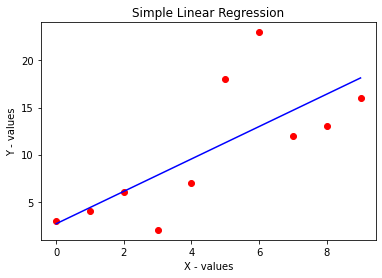

In [8]:
# plotting the graph 
plotting(X,y)

In [9]:
print(f'''MODEL PARAMETERS
        1. SSR = {SSR(X,y)}
        2. SST = {SST(y)}
        3. SSE = {SSE(X,y)}''')
print(f'The value of coefficient of determination = {R(X,y)}')
print(f'The value of VIF is {VIF(X,y)}')


MODEL PARAMETERS
        1. SSR = 244.41212121212118
        2. SST = 454.40000000000003
        3. SSE = 209.98787878787877
The value of coefficient of determination = 0.46212121212121227
The value of VIF is 1.8591549295774652


# ALL ABOUT THE SIMPLE LINEAR REGRESSION USING INBUILT FUNCTION 

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor

LinearRegression()

In [11]:
regressor.fit(X.reshape(-1,1),y)


LinearRegression()

In [12]:
regressor.intercept_

2.654545454545455

In [13]:
regressor.coef_

array([1.72121212])

# CONFUSION MATRIX 

In [14]:
actual = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
predicted = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]

In [15]:
# function to compute the confusion matrix 

def confusionmatrix(actual,predicted):
    
    # the classes during making of confusion matrix should be unique 
    classes = np.unique(actual)
    
    # creating a null matrix 
    confusion_matrix = np.zeros((len(classes),len(classes)))
    
    # looping around the actual to predicted with nested loop to cover each combination
    for i in range(len(classes)):
        for j in range(len(classes)):
            
            confusion_matrix[i,j] = np.sum((actual == classes[i]) & (predicted == classes[j]))
            
    return confusion_matrix 

In [16]:

confusionmatrix(actual,predicted)

array([[3., 0., 0., 0., 1.],
       [2., 1., 0., 1., 0.],
       [0., 1., 3., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.]])

In [17]:
# finding the confusion matrix using sklearn

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual,predicted)
cm

array([[3, 0, 0, 0, 1],
       [2, 1, 0, 1, 0],
       [0, 1, 3, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0]], dtype=int64)

In [18]:
total_sum = 0
tot_sum = 0
for i in range(0, len(cm)):
  for j in range(0, len(cm)): 
    tot_sum += cm[i][j]
tot_sum

15

In [19]:
# Hence we've a case of multi class classification
def params(mat, n):
  col_sum = [sum([row[i] for row in mat]) for i in range(0,len(mat[0]))]
  row_sum = [sum(mat[i]) for i in range(len(mat))]
  tp = mat[n][n]
  fp = row_sum[n] - tp
  fn = col_sum[n] - tp
  tn = tot_sum - fp - fn - tp
  param = []
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  param.append(accuracy)
  precision = tp / (tp + fp)
  param.append(precision)
  recall = tp / (tp + fn)
  param.append(recall)
  f1_score = (2 * precision * recall) / (precision + recall)
  param.append(f1_score)
  return param

In [20]:
for i in range(len(cm)):
  print(f"For the class {i+1}, the values are as follows: ")
  print(f"Accuracy: {params(cm,i)[0]}")
  print(f"Precision: {params(cm,i)[1]}")
  print(f"Recall: {params(cm,i)[2]}")
  print(f"F1-Score: {params(cm,i)[3]}")
  print("*********************")

For the class 1, the values are as follows: 
Accuracy: 0.8
Precision: 0.75
Recall: 0.6
F1-Score: 0.6666666666666665
*********************
For the class 2, the values are as follows: 
Accuracy: 0.6
Precision: 0.25
Recall: 0.25
F1-Score: 0.25
*********************
For the class 3, the values are as follows: 
Accuracy: 0.8666666666666667
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
*********************
For the class 4, the values are as follows: 
Accuracy: 0.8666666666666667
Precision: 0.0
Recall: 0.0
F1-Score: nan
*********************
For the class 5, the values are as follows: 
Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1-Score: nan
*********************


C:\Users\manav\AppData\Local\Temp\ipykernel_20176\647758938.py:16: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = (2 * precision * recall) / (precision + recall)


# Gradient Descent 

here we have to minimize to error in the model to find the optimum value of model

In [39]:

def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.001,
                     epsilon = 0.1):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0
    current_bias = 0
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=epsilon:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias

In [37]:
# Data
X = np.array([2,3,5,13,8,16,11,2])
Y = np.array([15,28,42,64,50,90,58,8])

Iteration 1: Cost 2612.125, Weight         0.9125, Bias 0.08875
Iteration 2: Cost 1840.6763140624998, Weight         1.67493125, Bias 0.163635
Iteration 3: Cost 1302.005232581096, Weight         2.31196293125, Bias 0.22693376124999998
Iteration 4: Cost 925.871456044458, Weight         2.8442089670375, Bias 0.28055044975875
Iteration 5: Cost 663.2295941170923, Weight         3.288894648664006, Bias 0.32607621435366996
Iteration 6: Cost 479.83363233031446, Weight         3.660413677716468, Bias 0.3648406421950025
Iteration 7: Cost 351.7712417354, Weight         3.9707936386157585, Bias 0.3979547557448655
Iteration 8: Cost 262.3456041853296, Weight         4.230084954185217, Bias 0.4263469416541394
Iteration 9: Cost 199.89814234552153, Weight         4.446685902528214, Bias 0.45079297345805286
Iteration 10: Cost 156.28823778710944, Weight         4.627614205814245, Bias 0.4719410989732135
Iteration 11: Cost 125.83169195535433, Weight         4.778733973781925, Bias 0.49033300368805344
Ite

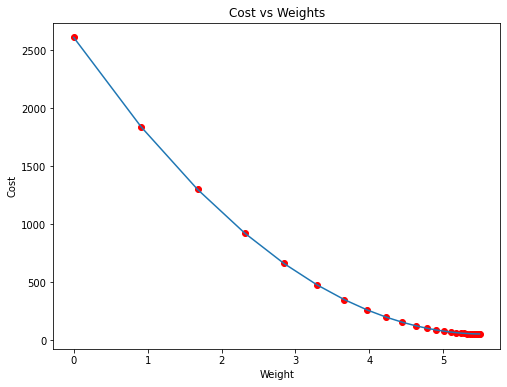

Estimated Weight: 5.498993129272515
Estimated Bias: 0.627417011189203


In [40]:
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

 